# Exploratory Data Analysis

In [99]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#loading dataset
from google.colab import files
uploaded = files.upload()

Saving Cardiotocographic.csv to Cardiotocographic (1).csv


In [101]:
data = pd.read_csv('Cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Check Missing Values

In [102]:
missing_values = data.isnull().sum()
print(missing_values)

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


## Data Conversion

In [103]:
data = data.apply(pd.to_numeric, errors='ignore')

In [104]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Detect and treat outliers

In [105]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
data = data[~outliers]

## Summary Statistics

In [106]:
summary = data.describe()
print(summary)

                LB           AC           FM           UC           DL  \
count  1954.000000  1955.000000  1974.000000  1974.000000  1974.000000   
mean    133.441667     0.003280     0.004290     0.004368     0.001752   
std      11.162659     0.004434     0.013575     0.002891     0.002728   
min      52.000000    -0.019284    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.001975     0.000000   
50%     133.000000     0.001705     0.000000     0.004521     0.000000   
75%     141.000000     0.005820     0.002367     0.006534     0.003085   
max     214.000000     0.038567     0.189320     0.013861     0.011837   

                DS           DP         ASTV         MSTV         ALTV  \
count  1954.000000  1954.000000  1974.000000  1974.000000  1974.000000   
mean      0.000003     0.000155    46.928060     1.297879     9.143254   
std       0.000144     0.000823    16.866324     0.783910    16.678182   
min      -0.001353    -0.005348    11

## Highlighting findings with highest standard deviation

In [107]:
std_dev = data.std()
max_std_dev_var = std_dev.idxmax()
print(f"Variable with highest standard deviation: {max_std_dev_var}")

Variable with highest standard deviation: Width


## Data Visualization

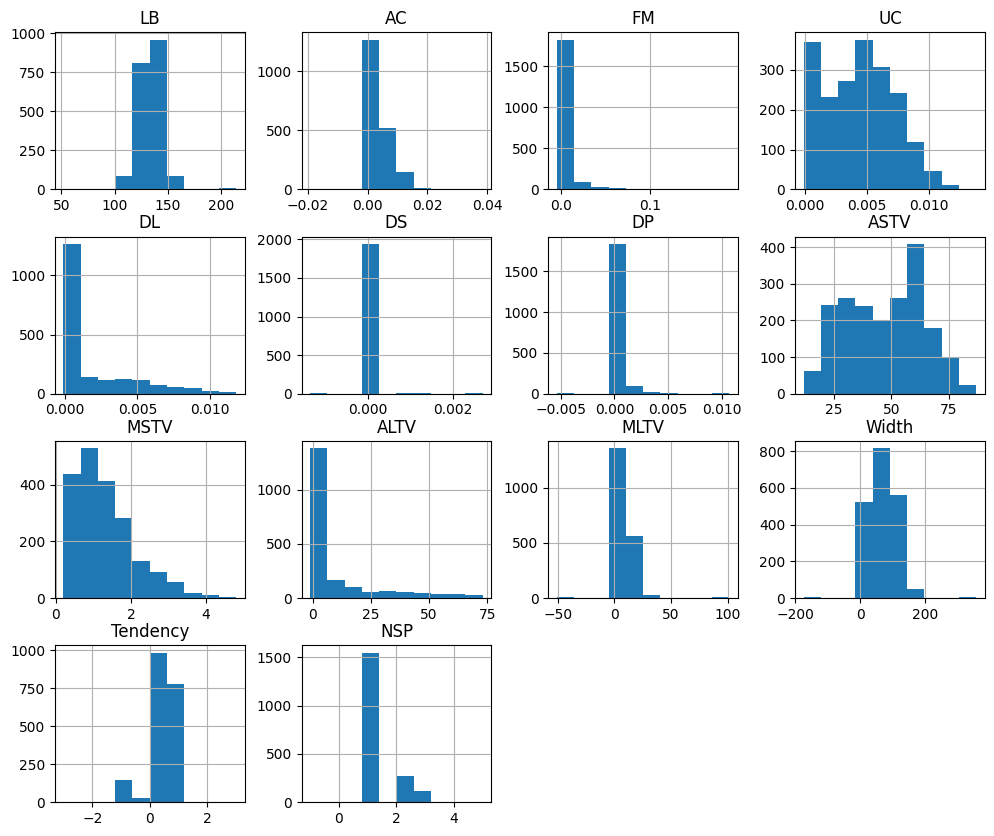

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram
data.hist(figsize=(12,10))
plt.show()

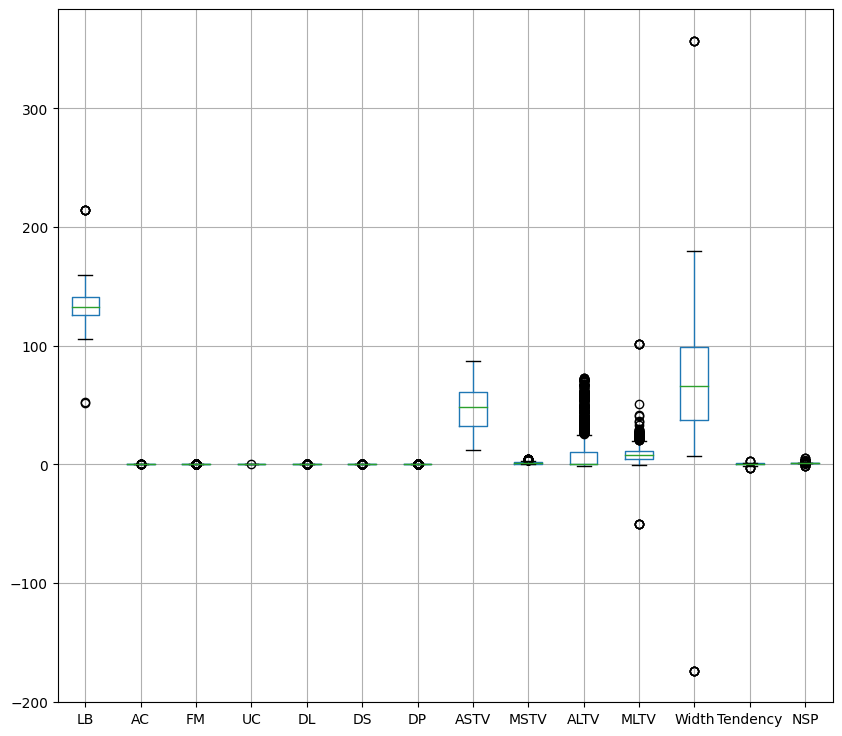

In [109]:
#box plot
data.boxplot(figsize=(10,9))
plt.show()

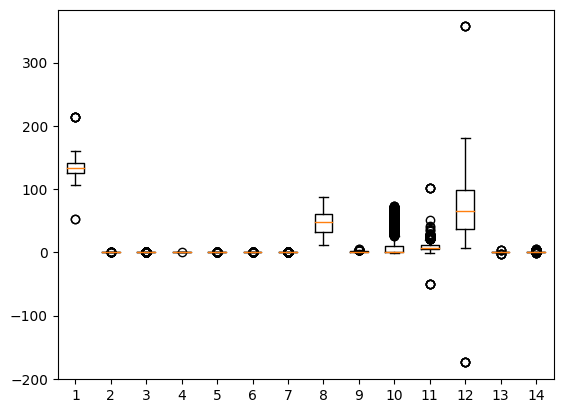

In [110]:
import warnings
warnings.filterwarnings("ignore")
data_box = data.dropna()
data1_box = data_box
data1_box
plt.boxplot(data1_box)
plt.show()

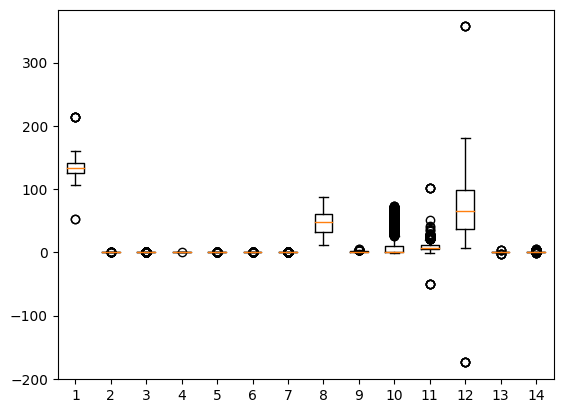

In [111]:
#Extracting outliers
box=plt.boxplot(data.dropna())

## Scatter Plot & Correlation

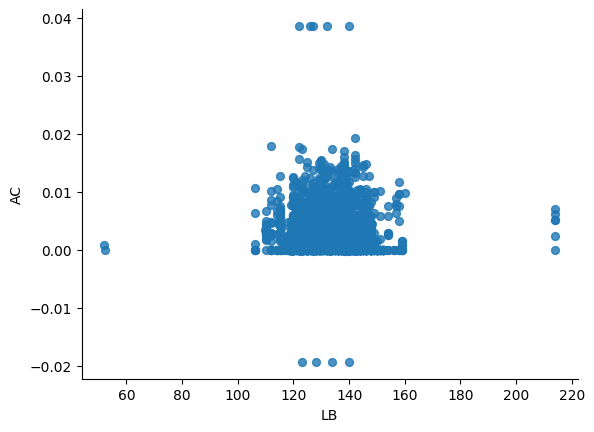

In [112]:
data.plot(kind='scatter', x='LB', y='AC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

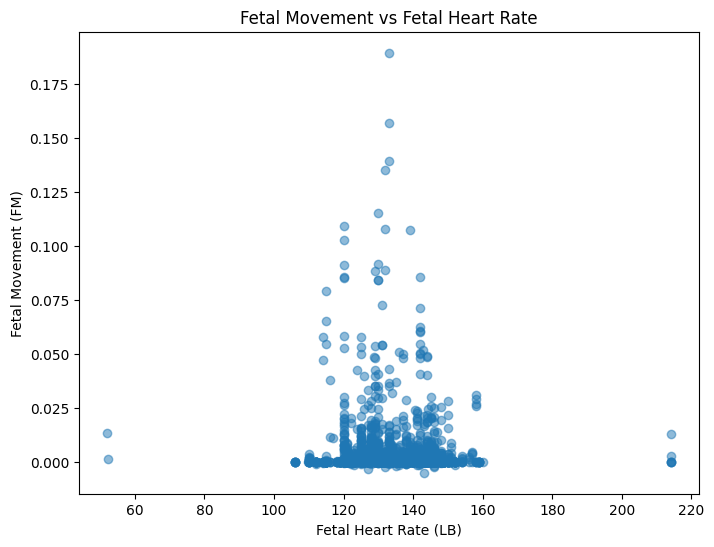

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(data['LB'], data['FM'], alpha=0.5)
plt.xlabel('Fetal Heart Rate (LB)')
plt.ylabel('Fetal Movement (FM)')
_ = plt.title('Fetal Movement vs Fetal Heart Rate')

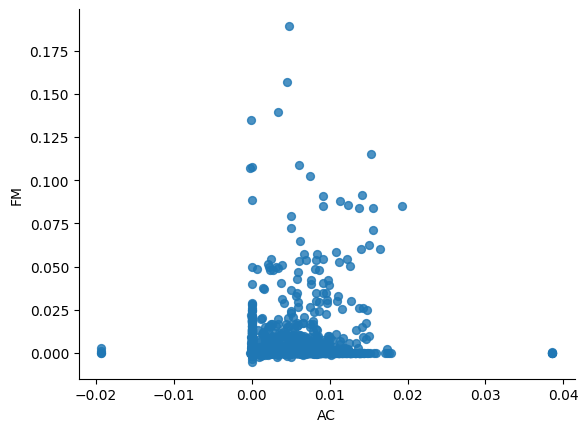

In [114]:
data.plot(kind='scatter', x='AC', y='FM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

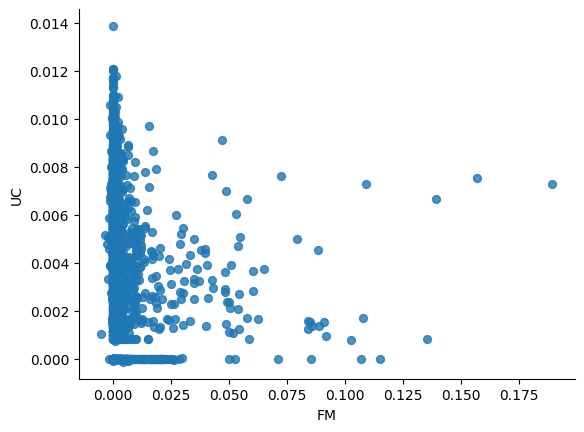

In [115]:
data.plot(kind='scatter', x='FM', y='UC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

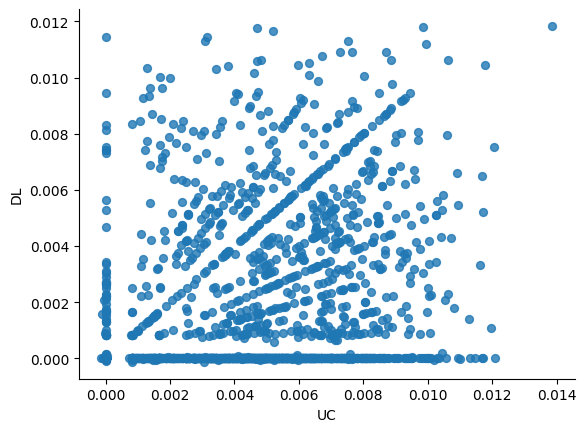

In [116]:
data.plot(kind='scatter', x='UC', y='DL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

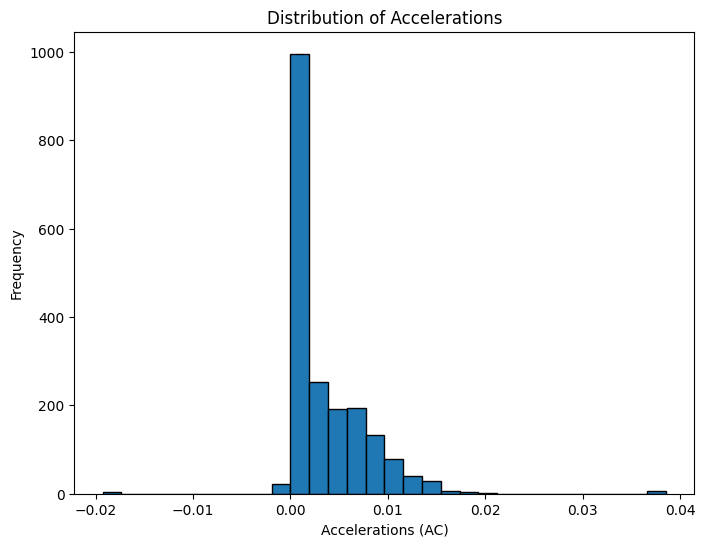

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(data['AC'], bins=30, edgecolor='black')
plt.xlabel('Accelerations (AC)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Accelerations')

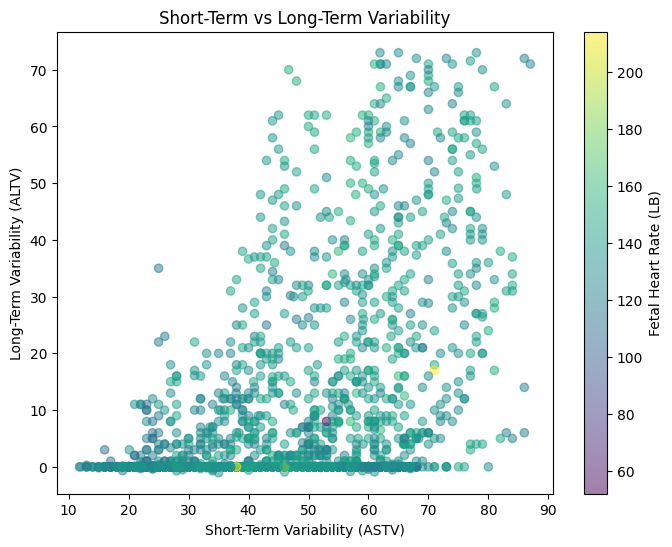

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(data['ASTV'], data['ALTV'], c=data['LB'], cmap='viridis', alpha=0.5)
plt.xlabel('Short-Term Variability (ASTV)')
plt.ylabel('Long-Term Variability (ALTV)')
plt.title('Short-Term vs Long-Term Variability')
_ = plt.colorbar(label='Fetal Heart Rate (LB)')

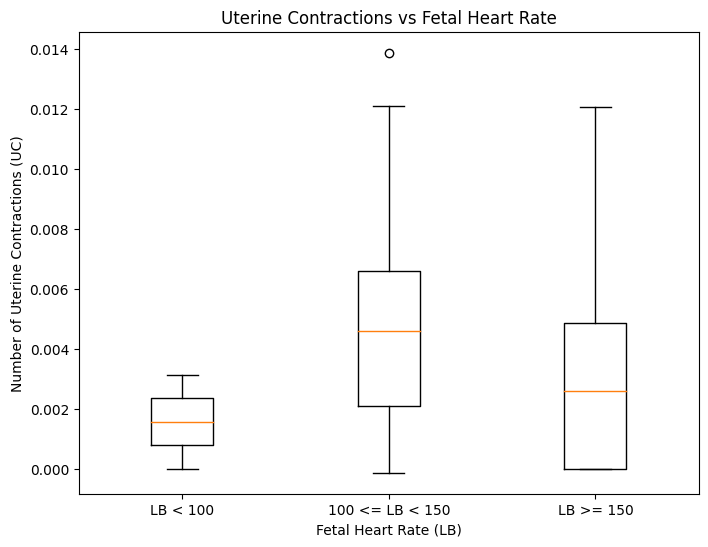

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot([data['UC'][data['LB'] < 100], data['UC'][(data['LB'] >= 100) & (data['LB'] < 150)], data['UC'][data['LB'] >= 150]], labels=['LB < 100', '100 <= LB < 150', 'LB >= 150'])
plt.xlabel('Fetal Heart Rate (LB)')
plt.ylabel('Number of Uterine Contractions (UC)')
_ = plt.title('Uterine Contractions vs Fetal Heart Rate')

In [120]:
data.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062545,-0.036264,-0.145324,-0.153317,-0.005630,-0.046106,0.264087,-0.270841,0.263484,-0.003492,-0.116942,0.248924,0.144818
AC,-0.062545,1.000000,0.153870,0.064352,-0.094704,-0.032485,-0.071909,-0.235800,0.197280,-0.319470,-0.120390,0.243287,0.022999,-0.305538
FM,-0.036264,0.153870,1.000000,-0.161862,0.001458,-0.005967,-0.021705,-0.046721,0.204907,-0.067417,0.001271,0.198169,0.051481,-0.045100
UC,-0.145324,0.064352,-0.161862,1.000000,0.270782,-0.004187,0.085904,-0.205244,0.264284,-0.273039,-0.062335,0.087107,-0.077362,-0.189321
DL,-0.153317,-0.094704,0.001458,0.270782,1.000000,0.080921,0.184312,-0.091290,0.553439,-0.270850,-0.174053,0.463259,0.038631,0.034289
DS,-0.005630,-0.032485,-0.005967,-0.004187,0.080921,1.000000,0.004211,0.014485,0.026065,-0.007237,0.033594,0.046130,-0.011445,0.074381
DP,-0.046106,-0.071909,-0.021705,0.085904,0.184312,0.004211,1.000000,0.059512,0.161003,-0.086529,-0.109345,0.138806,-0.113621,0.287845
ASTV,0.264087,-0.235800,-0.046721,-0.205244,-0.091290,0.014485,0.059512,1.000000,-0.410780,0.427406,-0.230213,-0.187005,-0.008017,0.454698
MSTV,-0.270841,0.197280,0.204907,0.264284,0.553439,0.026065,0.161003,-0.410780,1.000000,-0.489825,0.040780,0.582419,-0.052251,-0.109569
ALTV,0.263484,-0.319470,-0.067417,-0.273039,-0.270850,-0.007237,-0.086529,0.427406,-0.489825,1.000000,-0.091079,-0.373837,0.037165,0.363165
